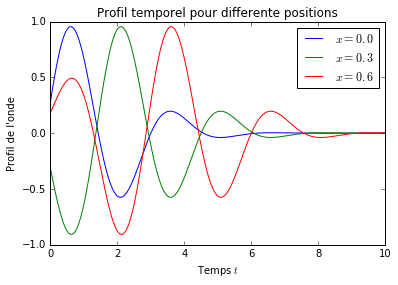

In [12]:
#so2 onde progressive
%matplotlib inline
import numpy as np               # Pour np.linspace, np.exp et np.cos
import matplotlib.pyplot as plt  # Pour les dessins


def f(u,k=10):
    '''Le profil de l'onde à propager: une gaussienne multipliée par un cosinus.'''
    return np.exp(-3*u**2) * np.cos(k*u-5)

nb_points  = 1000   # Le nombre de points d'échantillonnage du graphe
nb_courbes = 3      # Le nombre de courbes à représenter

# Tout d'abord la visualisation spatiale

x = np.linspace(-2,2,nb_points)   # Echantillonnage en position
t = np.linspace(0,5,nb_courbes)  # On regarde le profil à différents temps
c = 0.2 # Vitesse de propagation de l'onde

for ti in t:
    fi = f(x-c*ti) # Echantillonnage du profil pour les différents x
    plt.plot(x,fi,label='$t={}$'.format(round(ti,1))) # Affichage

# La cosmétique

plt.title('Profil spatial pour differents temps')
plt.xlabel('Position $x$')
plt.ylabel("Profil de l'onde")
plt.legend()
plt.savefig('PNG/S02_onde_progressive_spatial.png')
plt.clf()

# Tout d'abord la visualisation spatiale

t = np.linspace(0,10,nb_points)  # Echantillonnage en temps
x = np.linspace(0,0.6,nb_courbes)  # On regarde le profil à différentes positions
c = 0.2 # Vitesse de propagation de l'onde

for xi in x:
    fi = f(xi-c*t) # Echantillonnage du profil pour les différents t
    plt.plot(t,fi,label='$x={}$'.format(round(xi,1))) # Affichage

# La cosmétique

plt.title('Profil temporel pour differente positions')
plt.xlabel('Temps $t$')
plt.ylabel("Profil de l'onde")
plt.legend()
plt.show()

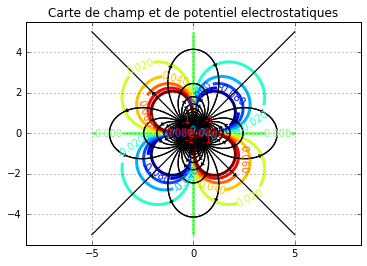

In [11]:
# carte de champ
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt



N = 4; # nombre de charges

q = np.array([-1,-1,1,1]) ; 	        # valeurs des charges
xq = np.array([-0.5,0.5,-0.5,0.5]) ;	# abscisses des charges
yq = np.array([-0.5,0.5,0.5,-0.5]) ;	# ordonnées des charges

# Intervalle de potentiels à tracer et nombre de courbes à tracer
Vmin = -.1;
Vmax = .1;	
NV = 10;
niveaux = np.linspace(Vmin,Vmax,NV+1,endpoint="true");

#print (niveaux);

plt.figure();

# Dimensions de la zone de tracé [-Lx,Lx]x[-Ly,Ly]
Lx = 5;
Ly = 5;
delta = 0.01 ;# pas de la grille pour le tracé des équipotentielles
npoints = 32; # nombres de ligne de champ à faire démarrer de chaque charge
d = 0.1; # distance de départ et d'arrêt de chaque de ligne de champ par rapport aux charges
l = 0.1;# taille de la flèche

# fonction potentiel électrostatique
def V(x,y):
	V=0
	for i in range(0,N):
		V += q[i]/np.sqrt((x-xq[i])**2+(y-yq[i])**2)
	return V;

# fonction champ électrique
def Ex(x,y):
	Ex = 0
	for i in range(0,N):
		Ex += q[i]/((x-xq[i])**2+(y-yq[i])**2)**1.5*(x-xq[i])
	return Ex;

def Ey(x,y):
	Ey = 0
	for i in range(0,N):
		Ey += q[i]/((x-xq[i])**2+(y-yq[i])**2)**1.5*(y-yq[i])
	return Ey;

# fonction tracé de flèches en x1,y1, d'angle alpha
def fleche(x1,y1,alpha):
	xfl = np.array([x1 + l*np.cos(.75*np.pi + alpha), x1, x1 + l*np.cos(-.75*np.pi + alpha)])
	yfl = np.array([y1 + l*np.sin(.75*np.pi + alpha), y1, y1 + l*np.sin(-.75*np.pi + alpha)])
	plt.plot(xfl, yfl, linewidth=1.2, color="black");


# fonction de tracé de lignes équipotentielles

Nlignes = 10000;	# nombre max d'itérations pour le tracé de la ligne de champ

def ligne(x0,y0,epsilon,i0): 	# (x0,y0) est le point de départ de la ligne de champ
	lx=[x0]
	ly=[y0]
	x = x0
	y = y0
	i = 0
	dist = 999999999999999.

	while (abs(x)<Lx and abs(y)<Ly and i<Nlignes and dist > d):
		i+=1
		Exx = Ex(x,y)
		Eyy = Ey(x,y)
		E = np.sqrt(Exx**2 + Eyy**2)	
		dx = Exx/E*delta*epsilon
		dy = Eyy/E*delta*epsilon
		x += dx
		y += dy
		dist = 99999999999.
		for j in range(0,N):
			if (j != i0):
				dist_j_i0 = np.sqrt( (x-xq[j])**2 + (y-yq[j])**2 )
				if (dist_j_i0 < dist):
					dist = dist_j_i0
	
		lx.append(x)
		ly.append(y)
	#print (i);
	
	# on trace la ligne de champ
	plt.plot(np.array(lx), np.array(ly), color="black",
             linewidth=1.2);
	# on trace deux flèches au 1/3 de la ligne
	x1 = lx[i//3]
	y1 = ly[i//3]
	cosalpha = Ex(x1,y1)/np.sqrt(Ex(x1,y1)**2 + Ey(x1,y1)**2)
	sinalpha = Ey(x1,y1)/np.sqrt(Ex(x1,y1)**2 + Ey(x1,y1)**2)
	if (sinalpha > 0):
		alpha = np.arccos(cosalpha)
	else:
		alpha = -np.arccos(cosalpha)
	fleche(x1,y1,alpha)	
	
# Calcule les points de départ des lignes de champ
def points_de_depart(N,xq,yq,d,npoints):
	for i in range(0,N):
		for j in range(0,npoints):
			x0 = xq[i] + d*np.sin(2*np.pi/npoints*j)
			y0 = yq[i] + d*np.cos(2*np.pi/npoints*j)
			ligne(x0,y0,abs(q[i])/q[i],i)


points_de_depart(N,xq,yq,d,npoints);

x = np.arange(-Lx,Lx,delta);
y = np.arange(-Ly,Ly,delta);
X, Y = np.meshgrid(x, y);

Z = V(X,Y);



for i in range(0,N):
	plt.text(xq[i]+.05,yq[i]+.05,"%s" % q[i], color="red");

plt.axis('equal');
plt.scatter(xq[0:N],yq[0:N]);
plt.grid();
CS = plt.contour(X, Y, Z, levels=niveaux, linewidths=3);
plt.clabel(CS, inline=1, fontsize=10);
plt.title('Carte de champ et de potentiel electrostatiques');
plt.plot();
#plt.savefig('PNG/Spe_cartes_electrostatiques.png')

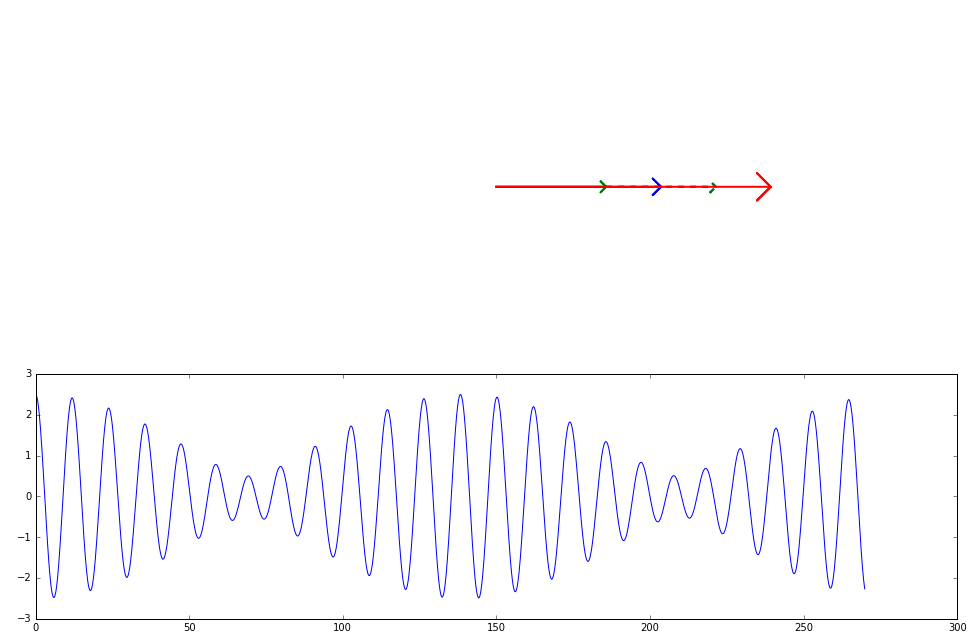

In [17]:
# so3 battements de fresnel
import numpy as np                # Boîte à outils numériques
import matplotlib.pyplot as plt   # Boîte à outils graphique
from matplotlib import animation  # Pour les animations "au vol"
from cmath import *               # Pour les complexes, notamment phase()

omega=0.5                         # Pulsation principale
delta_omega=0.045                 # Ecart de pulsation
delta_t=0.09                      # Intervale de temps entre deux points
N=3000                            # Nombre total de points
A = 1.5                           # Amplitude du deuxième signal

# Définition des flèches "à la main"
fleche_x=np.array([0,1,0.95,1,0.95,1])  # Dessin suivant x
fleche_y=np.array([0,0,0.05,0,-0.05,0]) # Dessin suivant y

def rotation_fleche(theta): 
    """ Rotation du dessin de base d'une flèche """
    fleche_rot_x=0.65*(fleche_x*np.cos(theta)-fleche_y*np.sin(theta))
    fleche_rot_y=0.65*(fleche_x*np.sin(theta)+fleche_y*np.cos(theta))
    return fleche_rot_x,fleche_rot_y

# On démarre le dessin proprement dit.
fig=plt.figure(figsize=(16,10),facecolor='w') # Définition de la figure
fig.add_axes([0.1,0.4,0.8,0.5])               # Partie supérieure
# Les flèches de bases
F1, =plt.plot(fleche_x,fleche_y,'g',lw=2)
F2, =plt.plot(A*fleche_x,A*fleche_y,'b',lw=2)
# Les flèches pour compléter les parallèlogrammes
F21,=plt.plot(fleche_x+fleche_x[1],fleche_y+fleche_y[1],'--b',lw=2)
F12,=plt.plot(fleche_x+fleche_x[1],fleche_y+fleche_y[1],'--g',lw=2)
# La flèche totale
Ft ,=plt.plot((1+A)*fleche_x,(1+A)*fleche_y,'r',lw=2)
plt.axis('equal')                   # Aspect carré
plt.axis([-4.2,4.2,-2.2,2.2])       # Centrage de la figure
plt.axis('off')                     # On enlève les numéros
fig.add_axes([0.1,0.05,0.8,0.34])   # Partie inférieure
temps=np.arange(0,N*delta_t,delta_t)# Le temps et la somme des cosinus
somme=A*np.cos((omega+delta_omega)*temps)+np.cos(omega*temps)
S,=plt.plot(temps,somme)            # Le graphique correspondant

def init(): # On initialise tout avec des données vides
    F1.set_xdata([])
    F1.set_ydata([])
    F2.set_xdata([])
    F2.set_ydata([])
    F21.set_xdata([])
    F21.set_ydata([])
    F12.set_xdata([])
    F12.set_ydata([])
    Ft.set_xdata([])
    Ft.set_ydata([])
    S.set_xdata([])
    S.set_ydata([])
    return F1,F2,F12,F21,Ft,S


def animate(i):               # Fonction qui met à jour les données
    t=delta_t*i               # Le temps
    # On utilise les complexes pour trouver le résultat final.
    c1 = rect(1,omega*t)
    c2 = rect(A,(omega+delta_omega)*t)
    c3 = c1 + c2
    # On effectue les trois rotations de la flèche de base
    fx,fy=rotation_fleche(omega*t)
    fx2,fy2=rotation_fleche((omega+delta_omega)*t)
    fx3,fy3=rotation_fleche(phase(c3))
    F1.set_xdata(fx)          # Mise à jour de la flèche 1
    F1.set_ydata(fy)
    F2.set_xdata(A*fx2)       # Mise à jour de la flcèeh 2
    F2.set_ydata(A*fy2)
    F21.set_xdata(A*fx2+fx[1])# Premier parallèlogramme
    F21.set_ydata(A*fy2+fy[1])
    F12.set_xdata(fx+A*fx2[1])# Second parallèlogramme
    F12.set_ydata(fy+A*fy2[1])
    Ft.set_xdata(abs(c3)*fx3)
    Ft.set_ydata(abs(c3)*fy3)
    S.set_xdata(temps[0:i])   # Mise à jour du graphique
    S.set_ydata(somme[0:i])
    return F1,F2,F12,F21,Ft,S

# Fabrication de l'animation
#anim = animation.FuncAnimation(fig,animate,N,interval=20,init_func=init,
       #blit=False,repeat=False)
# Décommenter la ligne suivante pour convertir l'animation en film .mp4
#anim.save('PNG/S03_battements_fresnel.mp4', fps=30,bitrate=50)

# Sinon on affiche l'animation à l'écran
plt.show()